In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.api as keras
from keras.api.layers import *

2025-03-14 08:46:23.197141: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-14 08:46:23.212868: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-14 08:46:23.217528: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-14 08:46:23.229554: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-14 08:46:23.934656: W tensorflow/compiler/tf2

In [2]:
class True_acc(keras.callbacks.Callback):
  def __init__(self,data_train,data_test):
    super().__init__()
    self.data_train = data_train
    self.data_test = data_test

  def on_epoch_end(self, epoch, logs=None):
    logs = logs or {}

    loss_train, acc_train = self.model.evaluate(self.data_train,verbose=0)
    loss_test, acc_test = self.model.evaluate(self.data_test, verbose=0)

    logs['train_loss'] = loss_train
    logs['train_acc'] = acc_train
    logs['val_loss'] = loss_test
    logs['val_acc'] = acc_test

    if acc_train is not None and acc_train >= .95:
      self.model.stop_training = True

    # print(f'\nTrain_loss = {loss_train}; Train_acc = {acc_train}')
    # print(f'\nTest_loss = {loss_test}; Test_acc = {acc_test}')

In [3]:
train = keras.preprocessing.image_dataset_from_directory(
    directory='../aptos2019_redim_224x224/train_0-1-2-3-4',
    shuffle=True,
    seed=777,
    image_size=(224,224),
)
test = keras.preprocessing.image_dataset_from_directory(
    directory='../aptos2019_redim_224x224/val_0-1-2-3-4',
    shuffle=True,
    seed=777,
    batch_size=5,
    image_size=(224,224),

)

weight = {
    0:2929/1433.,
    1:2929/300.,
    2:2929/808.,
    3:2929/154.,
    4:2929/234.,
}

Found 2929 files belonging to 5 classes.


I0000 00:00:1741952784.955443   96903 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741952784.996396   96903 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741952784.998973   96903 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741952785.001833   96903 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Found 110 files belonging to 5 classes.


In [4]:
input = Input((224,224,3))

x = Rescaling(1/255.)(input)

model = keras.applications.Xception(
    input_tensor=x,
    include_top=False,
    weights=None
)

x = Flatten()(model.output)
x = Dropout(.5)(x)
x = Dense(128)(x)
x = Dropout(.5)(x)
x = Dense(5,activation='softmax')(x)

model = keras.Model(input,x)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4,.6),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name='acc')]
)

# model.summary()

In [5]:
EPOCH = 50
model.fit(
    train,
    epochs=EPOCH,
    callbacks=[True_acc(train,test)],
)

Epoch 1/50


I0000 00:00:1741952801.422505   96952 service.cc:146] XLA service 0x72f0d8004b80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741952801.422523   96952 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2025-03-14 08:46:41.891336: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-14 08:46:44.047852: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2025-03-14 08:46:46.274948: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13117', 24 bytes spill stores, 24 bytes spill loads

2025-03-14 08:46:46.600534: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in funct

91/92 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - acc: 0.5426 - loss: 2.8555

2025-03-14 08:47:39.191134: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13117', 32 bytes spill stores, 32 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step - acc: 0.5431 - loss: 2.8474

2025-03-14 08:48:00.994774: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1028', 4 bytes spill stores, 4 bytes spill loads



92/92 ━━━━━━━━━━━━━━━━━━━━ 105s 631ms/step - acc: 0.5436 - loss: 2.8395 - train_loss: 1.5933 - train_acc: 0.2759 - val_loss: 1.6106 - val_acc: 0.2000
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 280ms/step - acc: 0.6909 - loss: 1.2626 - train_loss: 1.5906 - train_acc: 0.2759 - val_loss: 1.6118 - val_acc: 0.2000
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 280ms/step - acc: 0.7464 - loss: 0.9201 - train_loss: 1.6024 - train_acc: 0.2759 - val_loss: 1.6137 - val_acc: 0.2000
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 283ms/step - acc: 0.8529 - loss: 0.4792 - train_loss: 1.6036 - train_acc: 0.2759 - val_loss: 1.6201 - val_acc: 0.2000
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 284ms/step - acc: 0.9094 - loss: 0.3247 - train_loss: 1.5694 - train_acc: 0.2759 - val_loss: 1.6334 - val_acc: 0.2000
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/step - acc: 0.9492 - loss: 0.2818 - train_loss: 1.4610 - train_acc: 0.2998 - val_loss: 1.6184 - val_acc: 0.2000
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 26s 286ms/st

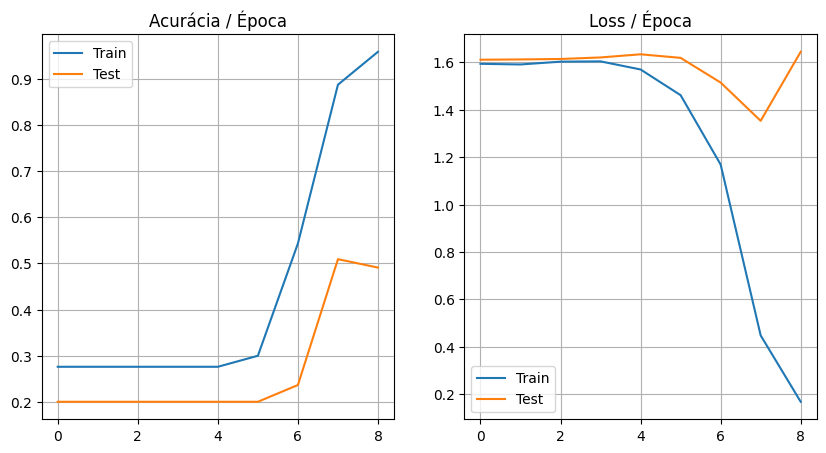

In [23]:
hist = model.history.history

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax = ax.ravel()

ax[0].plot(hist['train_acc'],label='Train')
ax[0].plot(hist['val_acc'],label='Test')
ax[0].grid(True,'both')
ax[0].set_title('Acurácia / Época')
ax[0].legend()

ax[1].plot(hist['train_loss'],label='Train')
ax[1].plot(hist['val_loss'],label='Test')
ax[1].grid(True,'both')
ax[1].set_title('Loss / Época')
ax[1].legend()

plt.show()